# Modelos de Clasificación

# Librerias

In [1]:
# operaciones datos y numéricas
import numpy as np
import pandas as pd
import math

# sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
## clasificaciones

# Para clasificación
from sklearn.ensemble import IsolationForest,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

## herramientas sklearn
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import make_scorer, r2_score,accuracy_score, f1_score, roc_auc_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score

# graficos
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# conexion google drive
#from google.colab import drive

# estadisticas
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# Para guardar modelos
import joblib

# Para la métrica personalizada
from collections import Counter
#from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

# Carga de Datos

In [2]:
## Montamos el DRIVE para tener acceso a los datos
#drive.mount('/content/drive')
dataset_clasificacion=pd.read_excel('df_capstone.xlsx')
#dataset_clasificacion=pd.read_excel('ArchivosExcel/dataset_clasificacion.xlsx')

In [3]:
#columns_drop=['Alim CuI','Sol_Cit','Fecha','Turno']
columns_drop=['Fecha','Turno']
dataset_clasificacion.drop(columns=columns_drop,inplace=True)
dataset_clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alim_CuT            600 non-null    float64
 1   Alim_CuS            600 non-null    float64
 2   Alim CuI            600 non-null    float64
 3   Ag                  600 non-null    float64
 4   Pb                  600 non-null    float64
 5   Fe                  600 non-null    float64
 6   Recuperacion_Turno  600 non-null    float64
 7   P80_Alim_Ro300      600 non-null    float64
 8   pH_Ro300            600 non-null    float64
 9   Tratamiento_Turno   600 non-null    float64
 10  Sol_Cit             600 non-null    float64
 11  Aire_Celdas         600 non-null    float64
 12  Nivel_Celdas        600 non-null    float64
dtypes: float64(13)
memory usage: 61.1 KB


## Preparación de los datos

In [4]:
df_clasificacion=dataset_clasificacion.copy()
variables_predictoras=['Alim_CuT', 'Alim_CuS','Alim CuI' ,'Ag', 'Pb', 'Fe', 'P80_Alim_Ro300', 'pH_Ro300','Sol_Cit',
       'Tratamiento_Turno', 'Aire_Celdas', 'Nivel_Celdas']
df_clasificacion['cumplimiento']=np.where(df_clasificacion['Recuperacion_Turno']>=86,1,0)
df_clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alim_CuT            600 non-null    float64
 1   Alim_CuS            600 non-null    float64
 2   Alim CuI            600 non-null    float64
 3   Ag                  600 non-null    float64
 4   Pb                  600 non-null    float64
 5   Fe                  600 non-null    float64
 6   Recuperacion_Turno  600 non-null    float64
 7   P80_Alim_Ro300      600 non-null    float64
 8   pH_Ro300            600 non-null    float64
 9   Tratamiento_Turno   600 non-null    float64
 10  Sol_Cit             600 non-null    float64
 11  Aire_Celdas         600 non-null    float64
 12  Nivel_Celdas        600 non-null    float64
 13  cumplimiento        600 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 65.8 KB


In [5]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

# Características de entrenamiento para clasificación
X_clas = df_clasificacion[variables_predictoras]
y_clas = df_clasificacion['cumplimiento']

# División de datos en entrenamiento y prueba
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    X_clas, y_clas, test_size=0.2, random_state=42, stratify=y_clas
)

# Mostrar distribución de clases
print("Distribución de clases en el conjunto completo:", Counter(y_clas))
print("Distribución de clases en el entrenamiento:", Counter(y_train_clas))
print("Distribución de clases en el test:", Counter(y_test_clas))

# Configuración de los pipelines con balanceo
pipelines = {
    'Logistic Regression': Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    'Decision Tree': Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
    ]),
}

# Diccionario de parámetros para cada modelo
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, 30],
        'classifier__criterion': ['gini', 'entropy']
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'classifier__max_depth': [10, 20, 30],
        'classifier__criterion': ['gini', 'entropy']
    }
}

# Configuración de validación cruzada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para almacenar los mejores modelos
best_models = {}

# Proceso de GridSearchCV para cada modelo
for name, pipeline in pipelines.items():
    print(f"Buscando mejores hiperparámetros para {name}...")
    search = GridSearchCV(
        pipeline, param_grids[name], 
        cv=cv_strategy, scoring='f1_macro', n_jobs=-1
    )
    search.fit(X_train_clas, y_train_clas)
    
    # Guardar el mejor modelo
    best_models[name] = {
        'best_estimator': search.best_estimator_,
        'best_params': search.best_params_,
        'best_score': search.best_score_
    }
    
    print(f"Mejores hiperparámetros para {name}: {search.best_params_}")
    print(f"Mejor F1-Score (macro): {search.best_score_:.4f}\n")

# Evaluación de los mejores modelos en el conjunto de prueba
print("Evaluación de los mejores modelos en el conjunto de prueba:")
for name, data in best_models.items():
    print(f"\nModelo: {name}")
    best_model = data['best_estimator']
    y_pred = best_model.predict(X_test_clas)
    y_proba = best_model.predict_proba(X_test_clas)[:, 1]
    
    print("Reporte de clasificación:")
    print(classification_report(y_test_clas, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test_clas, y_proba):.4f}")


Distribución de clases en el conjunto completo: Counter({0: 458, 1: 142})
Distribución de clases en el entrenamiento: Counter({0: 366, 1: 114})
Distribución de clases en el test: Counter({0: 92, 1: 28})
Buscando mejores hiperparámetros para Logistic Regression...
Mejores hiperparámetros para Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Mejor F1-Score (macro): 0.6654

Buscando mejores hiperparámetros para Random Forest...
Mejores hiperparámetros para Random Forest: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Mejor F1-Score (macro): 0.6918

Buscando mejores hiperparámetros para Gradient Boosting...
Mejores hiperparámetros para Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Mejor F1-Score (macro): 0.6993

Buscando mejores hiperparámetros para AdaBoost...
Mejores hiperparámetros para AdaBoost: {'classifier__learning_rate': 1, 'classifier__

In [6]:
# Importar librerías necesarias
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Crear una lista para almacenar las métricas de cada modelo
metrics = []

# Evaluación de los mejores modelos en el conjunto de prueba
print("Evaluación de los mejores modelos en el conjunto de prueba:")
for name, data in best_models.items():
    print(f"\nModelo: {name}")
    best_model = data['best_estimator']
    
    # Predicciones
    y_pred = best_model.predict(X_test_clas)
    y_proba = best_model.predict_proba(X_test_clas)[:, 1]
    
    # Cálculo de métricas
    roc_auc = roc_auc_score(y_test_clas, y_proba)
    f1_macro = f1_score(y_test_clas, y_pred, average='macro')
    report = classification_report(y_test_clas, y_pred, output_dict=True)
    
    # Guardar métricas en una lista
    metrics.append({
        'Modelo': name,
        'F1-Score Macro': f1_macro,
        'ROC-AUC': roc_auc,
        'Precision Clase 0': report['0']['precision'],
        'Recall Clase 0': report['0']['recall'],
        'Precision Clase 1': report['1']['precision'],
        'Recall Clase 1': report['1']['recall']
    })

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics)

# Ordenar los modelos por ROC-AUC o F1-Score
metrics_df = metrics_df.sort_values(by='F1-Score Macro', ascending=False)

# Mostrar las métricas en una tabla
print("\nResumen de métricas de los modelos:")


# # Guardar las métricas en un archivo CSV si lo deseas
# metrics_df.to_csv("resumen_metricas_modelos.csv", index=False)
# print("\nResumen de métricas guardado en 'resumen_metricas_modelos.csv'.")
metrics_df


Evaluación de los mejores modelos en el conjunto de prueba:

Modelo: Logistic Regression

Modelo: Random Forest

Modelo: Gradient Boosting

Modelo: AdaBoost

Modelo: K-Nearest Neighbors

Modelo: Decision Tree

Resumen de métricas de los modelos:


,Modelo,F1-Score Macro,ROC-AUC,Precision Clase 0,Recall Clase 0,Precision Clase 1,Recall Clase 1
1,Random Forest,0.709443,0.811918,0.882353,0.815217,0.514286,0.642857
3,AdaBoost,0.697479,0.786491,0.897436,0.760870,0.476190,0.714286
0,Logistic Regression,0.682540,0.782609,0.894737,0.739130,0.454545,0.714286
2,Gradient Boosting,0.679061,0.791925,0.876543,0.771739,0.461538,0.642857
5,Decision Tree,0.657143,0.690994,0.871795,0.739130,0.428571,0.642857
4,K-Nearest Neighbors,0.615385,0.769798,0.890625,0.619565,0.375000,0.750000


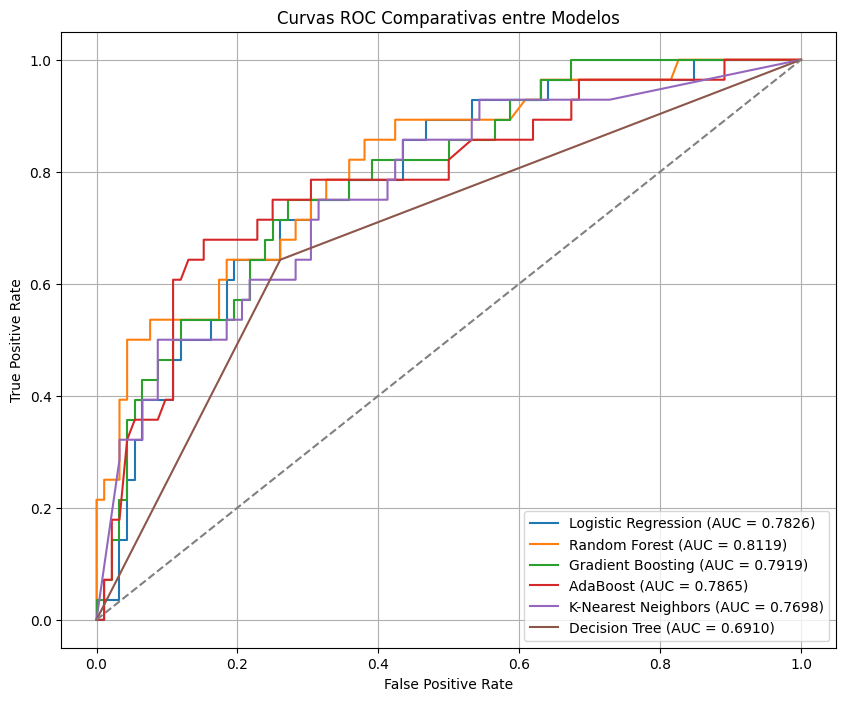

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Graficar las curvas ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, data in best_models.items():
    best_model = data['best_estimator']
    y_proba = best_model.predict_proba(X_test_clas)[:, 1]  # Probabilidad para la clase 1
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_clas, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Graficar
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Configuración del gráfico
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC Comparativas entre Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()


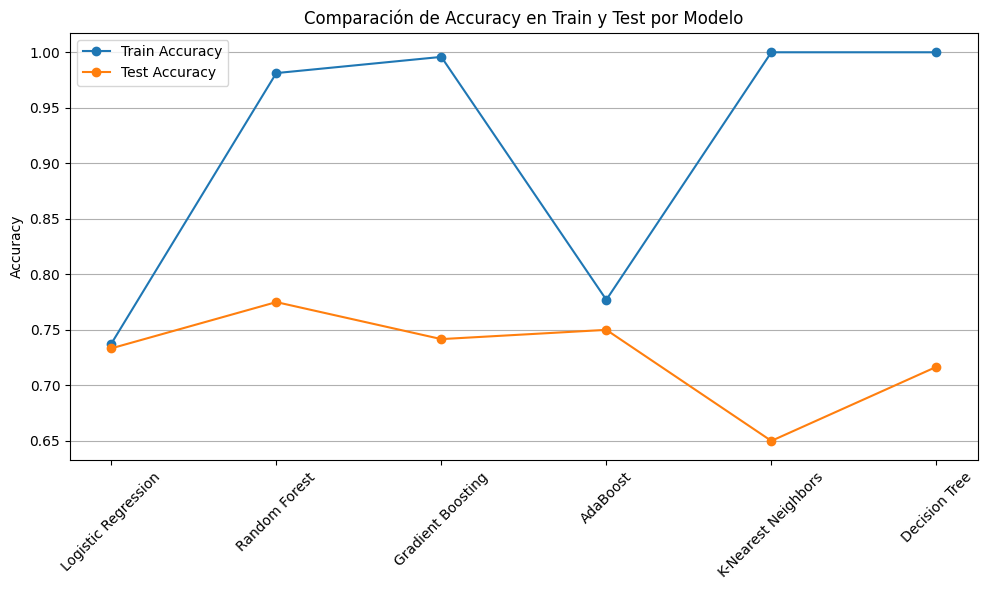

In [8]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear listas para almacenar los valores de accuracy
train_accuracy = []
test_accuracy = []
model_names = []

# Calcular la precisión en train y test para cada modelo
for name, data in best_models.items():
    best_model = data['best_estimator']

    y_train_pred = best_model.predict(X_train_clas)
    y_test_pred = best_model.predict(X_test_clas)

    train_acc = accuracy_score(y_train_clas, y_train_pred)
    test_acc = accuracy_score(y_test_clas, y_test_pred)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    model_names.append(name)

# Gráfico de líneas para train y test accuracy
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_accuracy, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(model_names, test_accuracy, marker='o', linestyle='-', label='Test Accuracy')

# Configuración del gráfico
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy en Train y Test por Modelo')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [9]:
print("Claves disponibles en best_models:", best_models.keys())

Claves disponibles en best_models: dict_keys(['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'K-Nearest Neighbors', 'Decision Tree'])


In [10]:
import os
import joblib

# Crear la carpeta "Modelos_2" si no existe
carpeta_modelos = "Modelos_2"
os.makedirs(carpeta_modelos, exist_ok=True)

# Guardar los modelos usando las claves correctas
joblib.dump(best_models['Random Forest']['best_estimator'], os.path.join(carpeta_modelos, 'RandomForest_model.pkl'))
joblib.dump(best_models['Gradient Boosting']['best_estimator'], os.path.join(carpeta_modelos, 'GradientBoosting_model.pkl'))
joblib.dump(best_models['AdaBoost']['best_estimator'], os.path.join(carpeta_modelos, 'AdaBoost_model.pkl'))

print("Modelos guardados correctamente en la carpeta 'Modelos_2'")


Modelos guardados correctamente en la carpeta 'Modelos_2'


In [11]:
best_models

{'Logistic Regression': {'best_estimator': Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                  ('scaler', StandardScaler()),
                  ('classifier',
                   LogisticRegression(C=0.1, class_weight='balanced',
                                      random_state=42, solver='liblinear'))]),
  'best_params': {'classifier__C': 0.1, 'classifier__solver': 'liblinear'},
  'best_score': np.float64(0.6653882054863841)},
 'Random Forest': {'best_estimator': Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                  ('scaler', StandardScaler()),
                  ('classifier',
                   RandomForestClassifier(class_weight='balanced', max_depth=10,
                                          n_estimators=50, random_state=42))]),
  'best_params': {'classifier__criterion': 'gini',
   'classifier__max_depth': 10,
   'classifier__n_estimators': 50},
  'best_score': np.float64(0.6917577848129615)},
 'Gradient Boosting': {'best_estimator': Pipeli

In [ ]:
joblib.dump(modelo[0], f'Modelos/{modelo[1]}.joblib')

### Revisión de distribución de clase objetivo

# Selección de modelos

In [11]:
col_drop_LR=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']
sort_LR=['param_C','param_solver','rank_test_score']
results_dfs['Logistic Regression'].drop(columns=col_drop_LR).sort_values(by=sort_LR, ascending=True)

NameError: name 'results_dfs' is not defined

In [12]:
col_drop_RF=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']
sort_RF=['param_criterion','param_max_features','param_max_depth','param_min_samples_split','param_n_estimators',]
results_dfs['Random Forest'].drop(columns=col_drop_RF).sort_values(by=sort_RF, ascending=True)

,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
195,entropy,1,log2,2,1,0.760417,0.760417,0.760417,0.760417,0.708333,0.750000,0.020833,464
196,entropy,1,log2,2,50,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,371
197,entropy,1,log2,2,100,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,371
198,entropy,1,log2,2,200,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,371
199,entropy,1,log2,2,300,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,log_loss,30,None,10,1,0.750000,0.708333,0.750000,0.729167,0.656250,0.718750,0.034861,499
536,log_loss,30,None,10,50,0.812500,0.822917,0.770833,0.729167,0.791667,0.785417,0.033333,202
537,log_loss,30,None,10,100,0.802083,0.802083,0.770833,0.739583,0.781250,0.779167,0.023199,285
538,log_loss,30,None,10,200,0.822917,0.802083,0.791667,0.739583,0.781250,0.787500,0.027639,163


In [13]:
col_drop_GB=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']
sort_GB=['param_learning_rate','param_max_depth','param_max_features','param_n_estimators','param_subsample']
results_dfs['Gradient Boosting'].drop(columns=col_drop_GB).sort_values(by=sort_GB, ascending=True)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.01,3,log2,50,0.25,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,260
13,0.01,3,log2,50,0.50,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,260
14,0.01,3,log2,50,0.75,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,260
15,0.01,3,log2,50,1.00,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,260
16,0.01,3,log2,100,0.25,0.770833,0.802083,0.760417,0.791667,0.770833,0.779167,0.015309,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.20,7,None,100,1.00,0.781250,0.760417,0.739583,0.729167,0.812500,0.764583,0.029901,254
320,0.20,7,None,200,0.25,0.802083,0.802083,0.770833,0.718750,0.791667,0.777083,0.031319,153
321,0.20,7,None,200,0.50,0.791667,0.770833,0.791667,0.729167,0.770833,0.770833,0.022822,205
322,0.20,7,None,200,0.75,0.802083,0.781250,0.781250,0.729167,0.760417,0.770833,0.024650,205


In [14]:
col_drop_AB=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']
sort_AB=['param_algorithm','param_learning_rate','param_n_estimators']
results_dfs['AdaBoost'].drop(columns=col_drop_AB).sort_values(by=sort_AB, ascending=True)

,param_algorithm,param_learning_rate,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,SAMME,0.01,50,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,7
1,SAMME,0.01,100,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,7
2,SAMME,0.01,200,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,7
3,SAMME,0.10,50,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,7
4,SAMME,0.10,100,0.760417,0.760417,0.760417,0.770833,0.760417,0.762500,0.004167,7
5,SAMME,0.10,200,0.760417,0.791667,0.760417,0.781250,0.750000,0.768750,0.015309,5
6,SAMME,1.00,50,0.760417,0.802083,0.739583,0.750000,0.739583,0.758333,0.023199,14
7,SAMME,1.00,100,0.750000,0.822917,0.750000,0.770833,0.729167,0.764583,0.032005,6
8,SAMME,1.00,200,0.760417,0.812500,0.729167,0.729167,0.739583,0.754167,0.031319,15
9,SAMME.R,0.01,50,0.760417,0.760417,0.760417,0.760417,0.770833,0.762500,0.004167,7


In [15]:
col_drop_KN=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']
sort_KN=['param_algorithm','param_leaf_size','param_n_neighbors','param_weights']
results_dfs['K-Nearest Neighbors'].drop(columns=col_drop_KN).sort_values(by=sort_KN, ascending=True)

,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,auto,15,3,distance,0.791667,0.718750,0.739583,0.739583,0.729167,0.743750,0.025173,97
0,auto,15,3,uniform,0.791667,0.718750,0.739583,0.739583,0.729167,0.743750,0.025173,97
3,auto,15,5,distance,0.760417,0.760417,0.791667,0.760417,0.750000,0.764583,0.014130,33
2,auto,15,5,uniform,0.760417,0.760417,0.791667,0.760417,0.750000,0.764583,0.014130,33
5,auto,15,7,distance,0.739583,0.739583,0.791667,0.760417,0.750000,0.756250,0.019320,65
...,...,...,...,...,...,...,...,...,...,...,...,...
90,kd_tree,60,5,uniform,0.760417,0.760417,0.791667,0.760417,0.750000,0.764583,0.014130,33
93,kd_tree,60,7,distance,0.739583,0.739583,0.791667,0.760417,0.750000,0.756250,0.019320,65
92,kd_tree,60,7,uniform,0.729167,0.739583,0.791667,0.760417,0.750000,0.754167,0.021449,81
95,kd_tree,60,9,distance,0.770833,0.739583,0.802083,0.822917,0.781250,0.783333,0.028260,1


In [16]:
col_drop_DT=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']
sort_DT=['param_criterion','param_max_depth','param_max_features','param_min_samples_split','param_splitter']
results_dfs['Decision Tree'].drop(columns=col_drop_DT).sort_values(by=sort_DT, ascending=True).dropna()

,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_splitter,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
78,entropy,1,log2,2,best,0.760417,0.760417,0.812500,0.760417,0.770833,0.772917,0.020199,3
79,entropy,1,log2,2,random,0.760417,0.760417,0.791667,0.760417,0.770833,0.768750,0.012148,7
80,entropy,1,log2,5,best,0.718750,0.760417,0.770833,0.760417,0.770833,0.756250,0.019320,35
81,entropy,1,log2,5,random,0.760417,0.791667,0.781250,0.729167,0.770833,0.766667,0.021449,9
82,entropy,1,log2,10,best,0.760417,0.760417,0.750000,0.760417,0.739583,0.754167,0.008333,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,log_loss,30,sqrt,2,random,0.739583,0.802083,0.718750,0.656250,0.687500,0.720833,0.049476,104
200,log_loss,30,sqrt,5,best,0.750000,0.760417,0.697917,0.687500,0.760417,0.731250,0.031869,83
201,log_loss,30,sqrt,5,random,0.708333,0.791667,0.729167,0.739583,0.822917,0.758333,0.042390,32
202,log_loss,30,sqrt,10,best,0.781250,0.760417,0.750000,0.677083,0.750000,0.743750,0.035232,60


In [17]:
# Mostrar los mejores modelos y sus hiperparámetros
for name, details in best_models.items():
    print(f"{name}:")
    print(f"  Mejores hiperparámetros: {details['best_params']}")
    print(f"  Mejor precisión (accuracy): {details['best_score']}\n")

Logistic Regression:
  Mejores hiperparámetros: {'C': 0.1, 'solver': 'liblinear'}
  Mejor precisión (accuracy): 0.7958333333333334

Random Forest:
  Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 300}
  Mejor precisión (accuracy): 0.8041666666666668

Gradient Boosting:
  Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200, 'subsample': 0.5}
  Mejor precisión (accuracy): 0.80625

AdaBoost:
  Mejores hiperparámetros: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}
  Mejor precisión (accuracy): 0.79375

K-Nearest Neighbors:
  Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 9, 'weights': 'distance'}
  Mejor precisión (accuracy): 0.7833333333333333

Decision Tree:
  Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 5, 'splitter': 'best'}
  Mejor

In [25]:
modelo_LR_Clas=LogisticRegression(C=0.1, solver='liblinear', random_state=42).fit(X_train_clas_std, y_train_clas)
modelo_RF_Clas=RandomForestClassifier(criterion='log_loss', max_depth= 20, max_features= None, min_samples_split= 5,class_weight='balanced_subsample',bootstrap=True, n_estimators= 500 ,random_state=42).fit(X_train_clas_std, y_train_clas)
modelo_GB_Clas=GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200,subsample=0.75, random_state=42,max_features= 'log2').fit(X_train_clas_std, y_train_clas)
modelo_AB_Clas=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.1, n_estimators=50, random_state=42).fit(X_train_clas_std, y_train_clas)
modelo_KN_Clas=KNeighborsClassifier(algorithm='auto',leaf_size=15,n_neighbors=9, weights='uniform').fit(X_train_clas_std, y_train_clas)
modelo_DT_Clas=DecisionTreeClassifier(criterion='log_loss',max_depth=1,max_features='sqrt' ,min_samples_split=5,splitter= 'best' ,random_state=42).fit(X_train_clas_std, y_train_clas)


In [18]:

modelo_LR_Clas=LogisticRegression(C=0.1, solver='liblinear', random_state=42).fit(X_train_clas_std, y_train_clas)
modelo_RF_Clas=RandomForestClassifier(criterion='entropy', max_depth= 40, max_features= 'sqrt', min_samples_split= 50,class_weight='balanced_subsample',bootstrap=True, n_estimators= 500, random_state=42).fit(X_train_clas_std, y_train_clas)
modelo_GB_Clas=GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,subsample=0.5, random_state=42,max_features= 'log2').fit(X_train_clas_std, y_train_clas)
modelo_AB_Clas=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.1, n_estimators=200, random_state=42).fit(X_train_clas_std, y_train_clas)
modelo_KN_Clas=KNeighborsClassifier(algorithm='auto',leaf_size=15,n_neighbors=9, weights='uniform').fit(X_train_clas_std, y_train_clas)
modelo_DT_Clas=DecisionTreeClassifier(criterion='log_loss',max_depth=10,max_features='log2' ,min_samples_split=10,splitter= 'random' ,random_state=42).fit(X_train_clas_std, y_train_clas)

In [22]:
modelo_RF_Clas.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'log_loss',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
modelos=[modelo_LR_Clas,modelo_RF_Clas,modelo_GB_Clas,modelo_AB_Clas,modelo_KN_Clas,modelo_DT_Clas]
modelos_nombres=['LogisticRegression','RandomForest','GradientBoosting','AdaBoost','KNeighborsClassifier','DecisionTree']

In [27]:
acc_score_train=[]
acc_score_test=[]
diferencia=[]
modelo_name=[]
for modelo in modelos:
    
    print('*'*80)
    print('modelo:',modelos_nombres[modelos.index(modelo)])
    pred_train=modelo.predict(X_train_clas_std)
    pred_test=modelo.predict(X_test_clas_std)

    #print("Respecto a las métricas de clasificación tenemos:")
    #print("Respecto a las métricas de clasificación tenemos:")
    #print("Entrenamiento")
    #print(classification_report(y_train_clas,pred_train))
    print(f'accuracy train: {accuracy_score(y_train_clas, pred_train)}')
    print(f'accuracy test: {accuracy_score(y_test_clas, pred_test)}')
    print(f'diferencia accuracy: {accuracy_score(y_train_clas, pred_train)-accuracy_score(y_test_clas, pred_test)}')
    print("-------------------------------------------------------")
    acc_score_train.append(accuracy_score(y_train_clas, pred_train))
    acc_score_test.append(accuracy_score(y_test_clas, pred_test))
    diferencia.append(accuracy_score(y_train_clas, pred_train)-accuracy_score(y_test_clas, pred_test))
    modelo_name.append(modelos_nombres[modelos.index(modelo)])
    #print("Testeo")
    #print(accuracy_score(y_test_clas, pred_train))
    #print(classification_report(y_test_clas,pred_test))

df_accuracy=pd.DataFrame({'modelo':modelo_name,'accuracy_train':acc_score_train,'accuracy_test':acc_score_test,'diferencia':diferencia})
df_accuracy

********************************************************************************
modelo: LogisticRegression
accuracy train: 0.7958333333333333
accuracy test: 0.8083333333333333
diferencia accuracy: -0.012500000000000067
-------------------------------------------------------
********************************************************************************
modelo: RandomForest
accuracy train: 1.0
accuracy test: 0.8083333333333333
diferencia accuracy: 0.19166666666666665
-------------------------------------------------------
********************************************************************************
modelo: GradientBoosting
accuracy train: 1.0
accuracy test: 0.7666666666666667
diferencia accuracy: 0.23333333333333328
-------------------------------------------------------
********************************************************************************
modelo: AdaBoost
accuracy train: 0.8125
accuracy test: 0.8166666666666667
diferencia accuracy: -0.004166666666666652
----------------

,modelo,accuracy_train,accuracy_test,diferencia
0,LogisticRegression,0.795833,0.808333,-0.012500
1,RandomForest,1.000000,0.808333,0.191667
2,GradientBoosting,1.000000,0.766667,0.233333
3,AdaBoost,0.812500,0.816667,-0.004167
4,KNeighborsClassifier,0.820833,0.800000,0.020833
5,DecisionTree,0.762500,0.766667,-0.004167


In [89]:
modelo_RF_Clas.score(X_train_clas_std, y_train_clas)

1.0

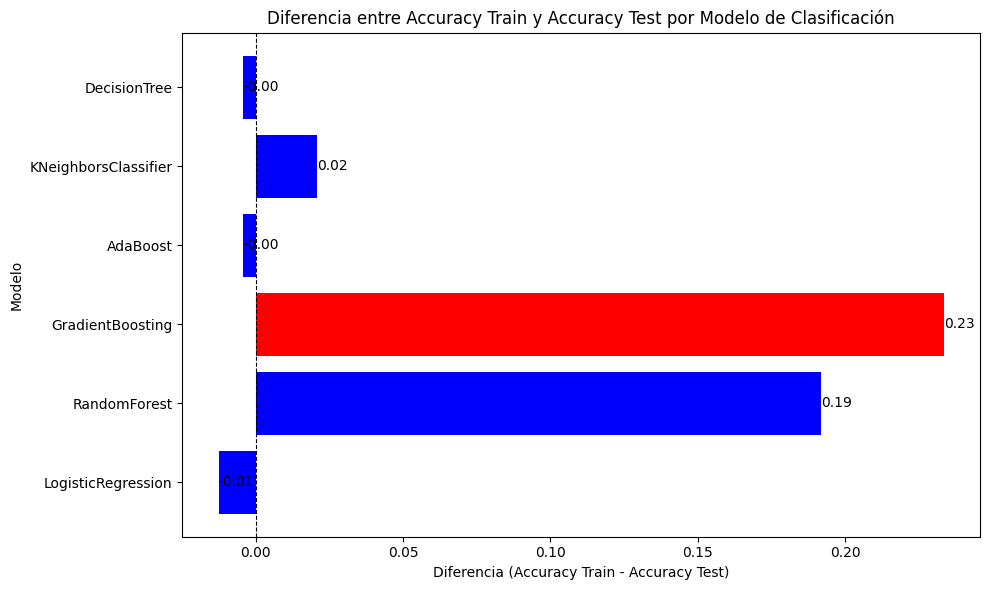

In [28]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(df_accuracy['modelo'], df_accuracy['diferencia'], color=np.where(df_accuracy['diferencia'] > 0.2, 'red', 'blue'))

# Etiquetas de los valores sobre las barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Etiquetas y título
plt.xlabel('Diferencia (Accuracy Train - Accuracy Test)')
plt.ylabel('Modelo')
plt.title('Diferencia entre Accuracy Train y Accuracy Test por Modelo de Clasificación')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea de referencia en 0

plt.tight_layout()
plt.show()


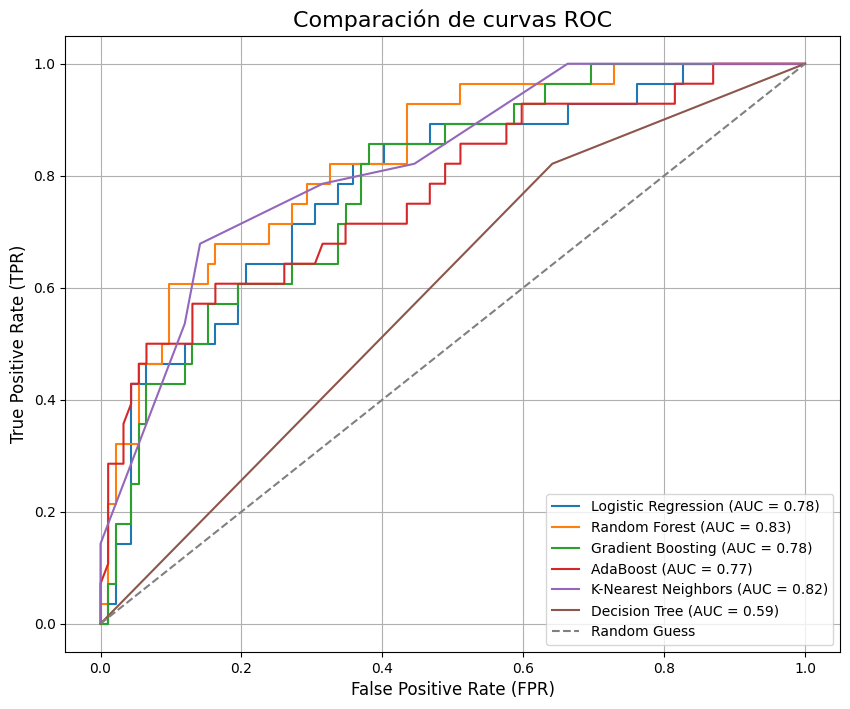

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Lista de modelos y nombres
modelos = [
    (modelo_LR_Clas, "Logistic Regression"),
    (modelo_RF_Clas, "Random Forest"),
    (modelo_GB_Clas, "Gradient Boosting"),
    (modelo_AB_Clas, "AdaBoost"),
    (modelo_KN_Clas, "K-Nearest Neighbors"),
    (modelo_DT_Clas, "Decision Tree")
]

# Crear gráfica ROC para comparar modelos
plt.figure(figsize=(10, 8))
for modelo, nombre in modelos:
    y_prob = modelo.predict_proba(X_test_clas_std)[:, 1]  # Probabilidad de clase positiva
    fpr, tpr, _ = roc_curve(y_test_clas, y_prob)          # Curva ROC
    roc_auc = auc(fpr, tpr)                              # Área bajo la curva
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.2f})')

# Configuración de la gráfica
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')  # Línea diagonal
plt.title('Comparación de curvas ROC', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()


In [38]:
probabilidad_GB=modelo_GB_Clas.predict_proba(X_test_clas_std)
prediccion_GB=modelo_GB_Clas.predict(X_test_clas_std)
probabilidad_RF=modelo_RF_Clas.predict_proba(X_test_clas_std)
prediccion_RF=modelo_RF_Clas.predict(X_test_clas_std)
probabilidad_AB=modelo_AB_Clas.predict_proba(X_test_clas_std)
prediccion_AB=modelo_AB_Clas.predict(X_test_clas_std)
probabilidad_LR=modelo_LR_Clas.predict_proba(X_test_clas_std)
prediccion_LR=modelo_LR_Clas.predict(X_test_clas_std)
probabilidad_KN=modelo_KN_Clas.predict_proba(X_test_clas_std)
prediccion_KN=modelo_KN_Clas.predict(X_test_clas_std)
probabilidad_DT=modelo_DT_Clas.predict_proba(X_test_clas_std)
prediccion_DT=modelo_DT_Clas.predict(X_test_clas_std)




thresholds = []
precision_global = []
recall_global = []
recall_clase_1 = []
TN=[]
FP=[]
FN=[]
TP=[]
accuracy=[]
f1=[]
model=[]
space=np.linspace(0,1,101)

for modelo in modelos:
    print(modelos_nombres[modelos.index(modelo)])
    for i in space:
        predicciones_Clas=modelo.predict_proba(X_test_clas_std)[:,1]>i
        report = classification_report(y_test_clas, predicciones_Clas, output_dict=True)
        TN.append(confusion_matrix(y_test_clas,predicciones_Clas)[0][0])
        FP.append(confusion_matrix(y_test_clas,predicciones_Clas)[0][1])
        FN.append(confusion_matrix(y_test_clas,predicciones_Clas)[1][0])
        TP.append(confusion_matrix(y_test_clas,predicciones_Clas)[1][1])
        precision_global.append(report['weighted avg']['precision'])
        recall_global.append(report['weighted avg']['recall'])
        recall_clase_1.append(report['1']['recall'])
        accuracy.append(accuracy_score(y_test_clas, predicciones_Clas))
        f1.append(f1_score(y_test_clas, predicciones_Clas))
        thresholds.append(i)
        model.append(modelos_nombres[modelos.index(modelo)])
        #display(f'Precisión global: {precision_global:.3f}')
        #display(f'Recall global: {recall_global:.3f}')
        #display(f'Recall clase 1: {recall_clase_1:.3f}')

df_metricas_clas=pd.DataFrame({'Modelo':model,'thresholds':thresholds,'precision_global':precision_global,'recall_global':recall_global,'recall_clase_1':recall_clase_1,'TN':TN,'FP':FP,'FN':FN,'TP':TP,'accuracy':accuracy,'f1':f1}) 


In [23]:
df_metricas_clas

NameError: name 'df_metricas_clas' is not defined

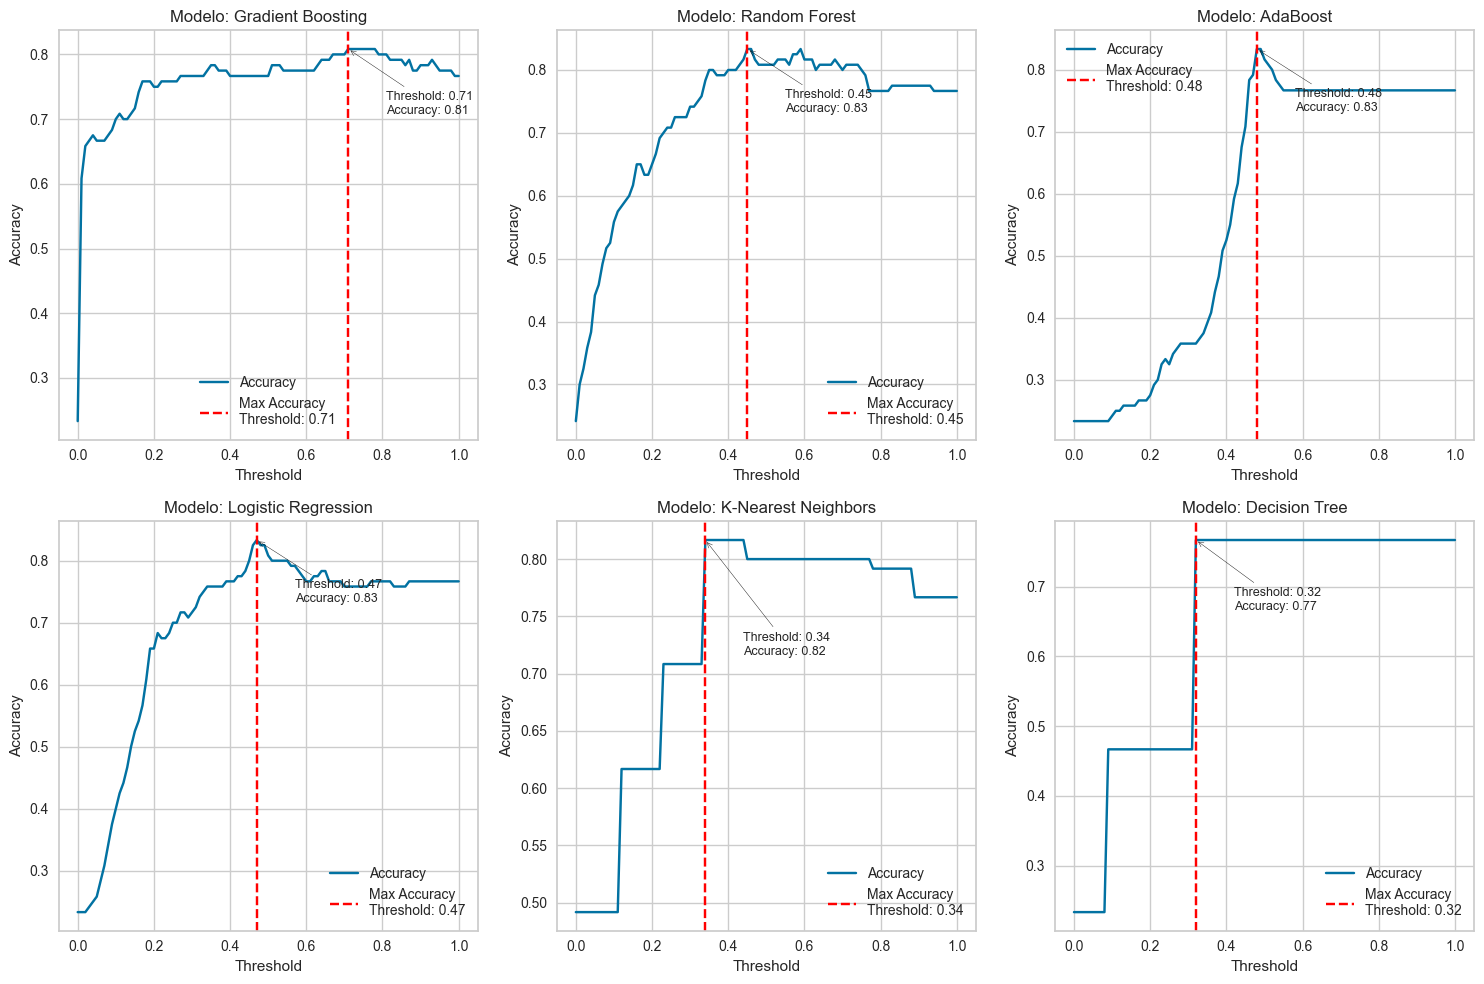

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la lista de modelos únicos
modelos_unicos = df_metricas_clas['Modelo'].unique()

# Configuración de subplots: ajustar filas y columnas según el número de modelos
num_modelos = len(modelos_unicos)
rows = (num_modelos // 3) + (num_modelos % 3 > 0)  # Filas dinámicas para 3 columnas
cols = 3  # Fijar columnas en 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Ajustar tamaño

# Aplanar los ejes para iterar fácilmente si hay varios subplots
axes = axes.flatten()

# Iterar sobre los modelos y crear gráficos
for idx, modelo in enumerate(modelos_unicos):
    # Filtrar los datos para el modelo actual
    df_modelo = df_metricas_clas[df_metricas_clas['Modelo'] == modelo]
    
    # Encontrar el threshold con el mayor accuracy
    max_accuracy_row = df_modelo[df_modelo['Accuracy'] == df_modelo['Accuracy'].max()].iloc[0]
    max_threshold = max_accuracy_row['Threshold']
    max_accuracy = max_accuracy_row['Accuracy']

    # Crear gráfico en el subplot correspondiente
    ax = axes[idx]
    sns.lineplot(data=df_modelo, x='Threshold', y='Accuracy', ax=ax, label='Accuracy')
    
    # Línea vertical para el threshold con el mayor accuracy
    ax.axvline(x=max_threshold, color='red', linestyle='dashed', label=f'Max Accuracy\nThreshold: {max_threshold:.2f}')
    
    # Agregar anotación
    ax.annotate(
        f"Threshold: {max_threshold:.2f}\nAccuracy: {max_accuracy:.2f}",
        xy=(max_threshold, max_accuracy),
        xytext=(max_threshold + 0.1, max_accuracy - 0.1),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=9
    )
    
    # Títulos y etiquetas
    ax.set_title(f"Modelo: {modelo}")
    ax.set_xlabel("Threshold")
    ax.set_ylabel("Accuracy")
    ax.legend()

# Ocultar subplots vacíos si hay menos modelos que espacios
for idx in range(len(modelos_unicos), len(axes)):
    axes[idx].axis('off')

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()


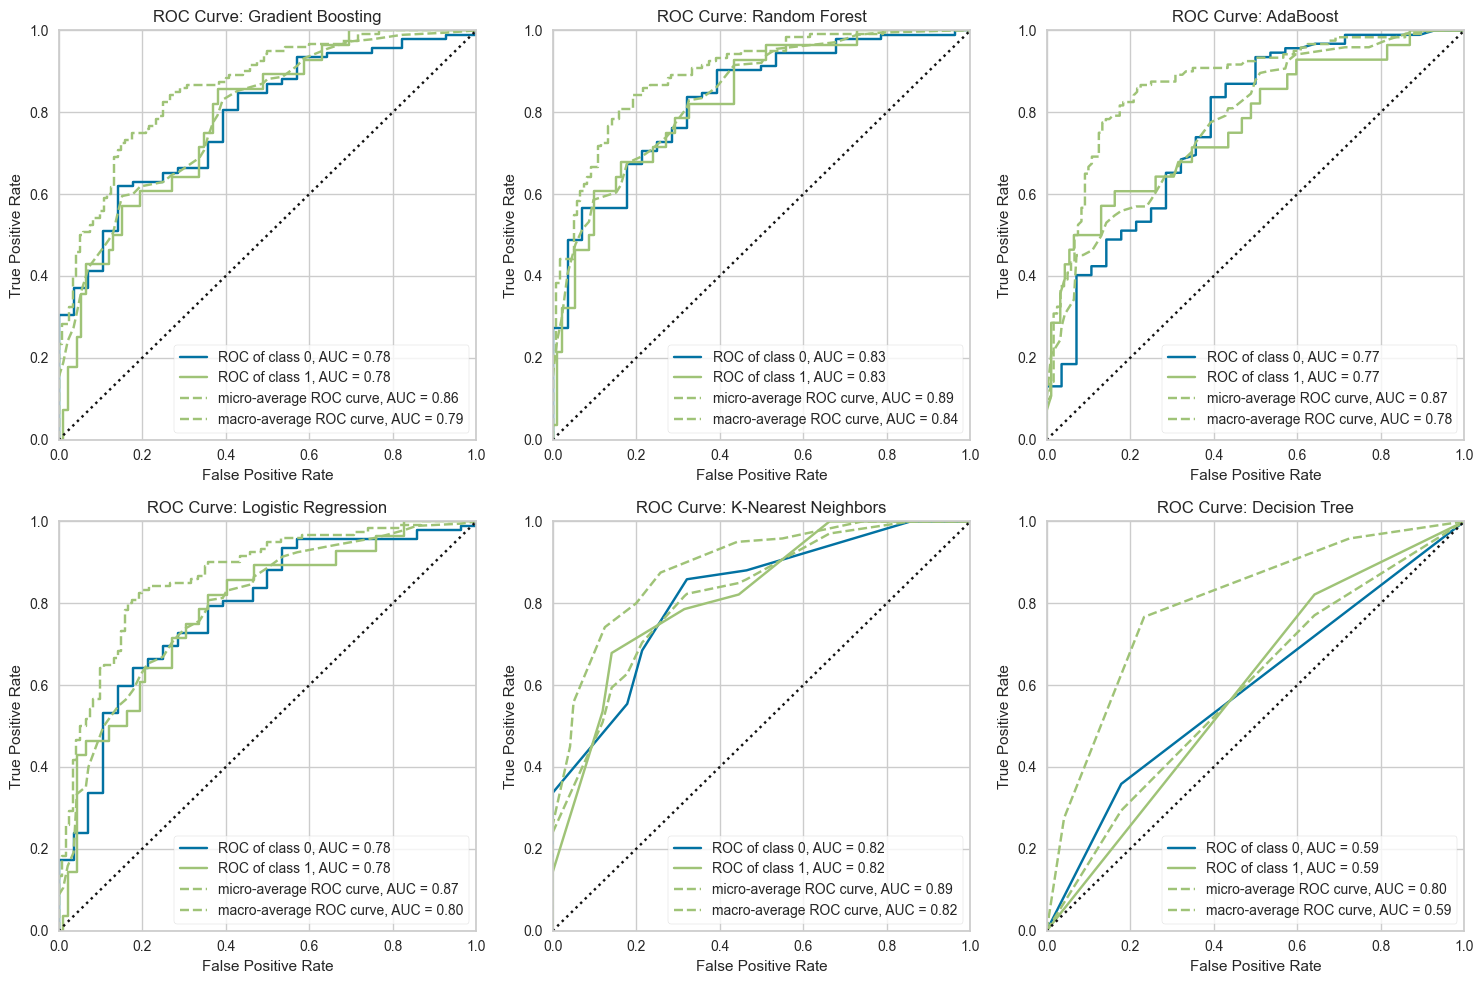

In [48]:
from yellowbrick.classifier import ROCAUC

# Lista de modelos con nombres
modelos = [
    (modelo_GB_Clas, "Gradient Boosting"),
    (modelo_RF_Clas, "Random Forest"),
    (modelo_AB_Clas, "AdaBoost"),
    (modelo_LR_Clas, "Logistic Regression"),
    (modelo_KN_Clas, "K-Nearest Neighbors"),
    (modelo_DT_Clas, "Decision Tree")
]

# Crear subplots para gráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas y 3 columnas

# Generar la curva ROC para cada modelo
for (model, name), ax in zip(modelos, axes.flatten()):
    visualizer = ROCAUC(model, ax=ax)  # Crear el visualizador y asignar el subplot
    visualizer.fit(X_train_clas_std, y_train_clas)  # Ajustar con datos de entrenamiento
    visualizer.score(X_test_clas_std, y_test_clas)  # Evaluar en el conjunto de prueba
    visualizer.finalize()  # Configurar el gráfico (sin mostrar aún)
    ax.set_title(f"ROC Curve: {name}")  # Añadir un título personalizado

# Ajustar el diseño
plt.tight_layout()  # Evitar superposición de gráficos
plt.show()  # Mostrar todos los gráficos juntos



# Guardar modelos

#### salvar modelo de clasificación

In [55]:
modelos = [
    (modelo_LR_Clas, "LogisticRegressionClas"),
    (modelo_RF_Clas, "RandomForestClas"),
    (modelo_GB_Clas, "GradientBoostingClas"),
    (modelo_AB_Clas, "AdaBoostClas"),
    (modelo_KN_Clas, "K-NearestNeighborsClas"),
    (modelo_DT_Clas, "DecisionTreeClas")
]

In [56]:
for modelo in modelos:
    joblib.dump(modelo[0], f'Modelos/{modelo[1]}.joblib')
    print(f"Modelo {modelo[1]} guardado exitosamente.")

Modelo LogisticRegressionClas guardado exitosamente.
Modelo RandomForestClas guardado exitosamente.
Modelo GradientBoostingClas guardado exitosamente.
Modelo AdaBoostClas guardado exitosamente.
Modelo K-NearestNeighborsClas guardado exitosamente.
Modelo DecisionTreeClas guardado exitosamente.
